In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

Задача 1: Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

0.0010554790496826172


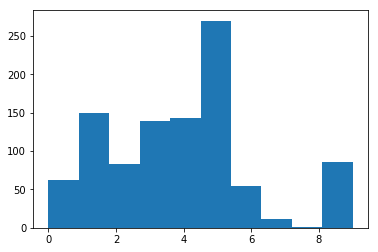

In [2]:
a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

firstly=time.time()
a /= a.sum()
a = a.cumsum()
finaly1=time.time()
k = np.searchsorted(a, np.random.rand(1000))
finaly2=time.time()
plt.hist(k)

print(finaly2-finaly1)

Задача 2: Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

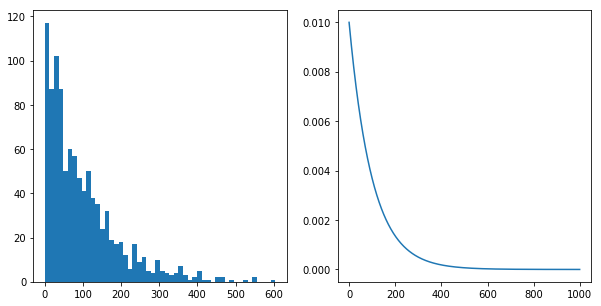

In [5]:
lambd=0.01
x= np.random.rand(1000)
y=np.random.exponential(scale=0.01)
y=-np.log(1-x)/lambd
fig, ax = plt.subplots(1,2,figsize =(10,5))
ax[0].hist(y, bins = 50)
ax[1].plot(np.arange(1000),lambd * np.exp(-lambd*np.arange(1000)))
plt.show()

Задача 3: Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

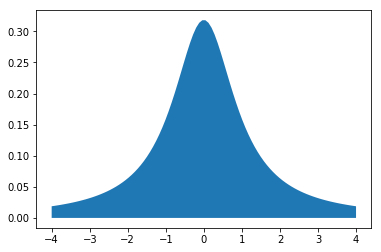

In [6]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x))
plt.show()

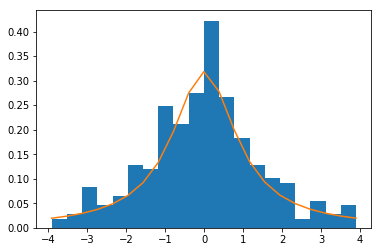

In [11]:
a = np.random.uniform(-4,4,1000)
b = np.random.uniform(0,0.35,1000)
k =a[b < (1/np.pi)*1/(np.power(a,2)+1)]
n, h, p = plt.hist(k,20, density = 1) 
x = (1/np.pi)*1/(np.power(h,2)+1)
plt.plot(h, x)
plt.show()

Задача 4: Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

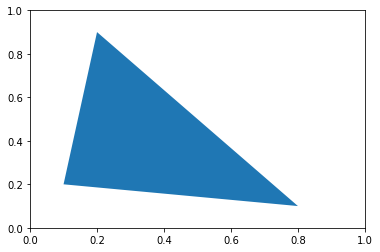

In [12]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

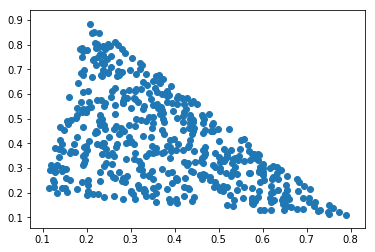

In [13]:
import math as mt
N = np.random.rand(500)

b = np.array([(1 - mt.sqrt(1 - N[i]))for i in range(500) ]) 
c = np.random.rand(500) * (1 - b) 
x = 0.1 + 0.7 * b + 0.1 * c 
y = 0.2 - 0.1 * b + 0.7 * c 
plt.scatter(x, y)
plt.show()


Задача 5: Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

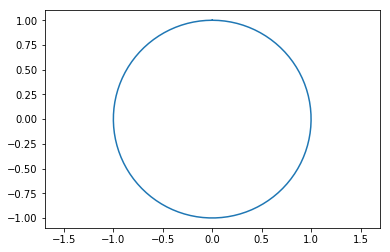

In [14]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

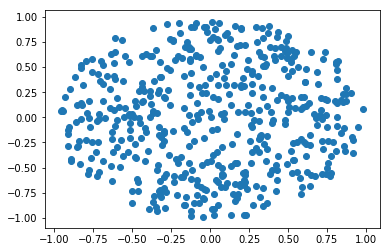

In [15]:
N = np.random.uniform(0,1,500)
a = np.sqrt(N) 
b = np.random.uniform(0,2*np.pi,500)
plt.scatter(a * np.cos(b), a * np.sin(b))
plt.show()

Задача 6: Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

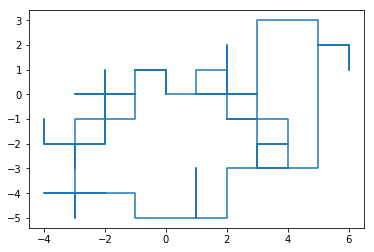

In [23]:
def func(n):
    a0 = np.random.choice(np.arange(n), n // 2, replace=False)
    b0 = np.random.choice(np.arange(n), n // 2, replace=False)
    a= np.ones(n)
    b = np.ones(n)
    a[-a0] = -1
    b[-b0] = -1
    a1 = np.cumsum(a)
    b1 = np.cumsum(b)
    x = (a1 + b1) / 2 
    y = (b1 - a1) / 2
    return x,y

n = 100
x, y = func(n)
plt.plot(x, y)
plt.show()

Задача 7: Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

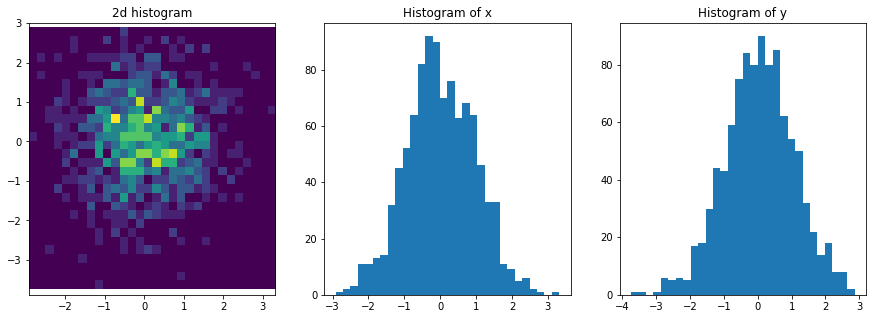

In [24]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

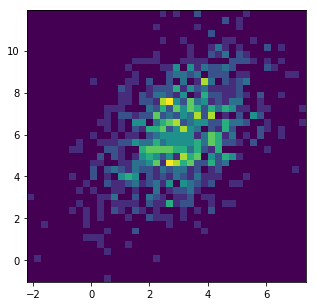

In [25]:
import math as mt
x0= x + y + 3 
y0=((1 - mt.sqrt(7)) /2 * x)+ (1 + mt.sqrt(7))/2 * y + 6 
plt.figure(figsize=(5,5))
plt.hist2d(x0, y0, bins =40) 
plt.show()


Задача: С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число π. Теоретически обоснуйте необходимое число бросаний, чтобы оценить число π с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [28]:
def func(n):
    k=0
    for i in np.arange(n):
        x= np.random.uniform(-1, 1)
        y= np.random.uniform(-1, 1)
        if mt.sqrt(x*x + y*y) <= 1:
            k+=1
    return (4*float(k)/n)
func(700000)

3.1412628571428574